#Análisis exploratorio de las actividades culturales en la República Argentina.

A través de diversos datasets, nos adentraremos en las distintas actividades culturales que pueden realizarse en Argentina. Repasando las capacidades, cualidades e historias de estos espacios de entretenimiento.



---



# 1. Primeros pasos.

##1.1. Librerías a utilizar.

In [ ]:
#Cargamos las librerías que se utilizarán para el análisis.
import pandas as pd
import matplotlib.pyplot as plt

##1.2. Datos.

### Los datasets utilizados son de uso público y pueden encontrarse en la siguiente página: [Datos Argentina](https://www.datos.gob.ar)

In [ ]:
#Utilizaremos 7 datasets con información sobre diversas actividades culturales que ofrece la República Argentina.
cines= pd.read_csv("salas_cine.csv")
teatros= pd.read_csv("17_teatro.xlsx-datos-abiertos.csv")
centros_culturales= pd.read_csv("centros_culturales.csv")
galerias_arte= pd.read_csv("galerias-de-arte.csv")
lugares_históricos= pd.read_csv("monumentos-y-lugares-historicos.csv")
museos= pd.read_csv("museos_datosabiertos.csv")
bibliotecas_populares= pd.read_csv("biblioteca_popular.csv")

# 2. Limpieza de los sets.

## 2.1. SET: Cines.

In [1]:
#Revisamos los componentes del set:
cines.info()
cines.head()

NameError: ignored

### Como observamos el data set tiene un total de 22 columnas y 316 entradas.  Casi todas las columnas tienen sus entradas completas, a exepción de 3 (piso, web y tipo de gestión). En general, el set se ve bastante origanizado y limpio. 

In [ ]:
#Este análisis explorativo solo utilizará ciertas columnas del set, por lo que comenzaremos quitando la info que no necesitamos:
cines.drop(['cod_localidad','categoria','id_provincia', 'id_departamento','piso','cp','web','fuente','sector','año_actualizacion','departamento','direccion','tipo_latitud_longitud'], axis=1, inplace=True)

In [ ]:
#Colocamos la columna con el nombre del cine en el primer lugar:
primera= cines.pop('nombre')
cines.insert(0, 'nombre', primera)

In [ ]:
#Revisamos el set:
cines.head()

In [ ]:
#Con las columnas seleccionadas, comenzamos a inspeccionar los datos para asegurarnos de que todo está correcto.
#Buscamos datos duplicados:
duplica= cines.duplicated()
for i in duplica:
    if i == True:
        print (i)
    
print('No hay duplicados')


In [ ]:
#Chequeamos la columna de provincias:
cines['provincia'].unique()

In [ ]:
cines.info()

## 2.2 SET: Teatros.

In [ ]:
teatros.info()
teatros.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cod_loc                  1364 non-null   int64  
 1   id_prov                  1364 non-null   int64  
 2   id_departamento          1364 non-null   int64  
 3   observaciones            0 non-null      float64
 4   categoria                1364 non-null   object 
 5   subcategoria             0 non-null      float64
 6   provincia                1364 non-null   object 
 7   departamento             1364 non-null   object 
 8   localidad                1364 non-null   object 
 9   nombre                   1364 non-null   object 
 10  domicilio                1364 non-null   object 
 11  piso                     1180 non-null   object 
 12  CP                       1361 non-null   object 
 13  cod_area                 1333 non-null   object 
 14  telefono                

,cod_loc,id_prov,id_departamento,observaciones,categoria,subcategoria,provincia,departamento,localidad,nombre,...,latitud,longitud,TipoLatitudLongitud,actividad_especifica,denominacion_especifica,fuente,tipo_gestion,inicio_act,capacidad,ano_actualizacion
0,6861010,6,6861,NaN,Salas de Teatro,NaN,Buenos Aires,Vicente Lopez,Vicente Lopez,Alparamis,...,-34.51051300,-58.47802900,Precisa,NaN,NaN,Red de Espacios Culturales Vicente López,Privado,0.0,NaN,2019
1,6861010,6,6861,NaN,Salas de Teatro,NaN,Buenos Aires,Vicente Lopez,Vicente Lopez,Complejo Cultural Comunicanto,...,-34.53743370,-58.51288690,Precisa,NaN,NaN,Red de Espacios Culturales Vicente López,Privado,0.0,NaN,2019
2,2000010,2,2000,NaN,Salas de Teatro,NaN,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,La Fábrica,...,-34.59540311,-58.43663057,Precisa,NaN,s/d,Alternativa Teatral / Relevamiento 2017,Privado,0.0,0.0,2020
3,2000010,2,2000,NaN,Salas de Teatro,NaN,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Arlequino,...,-34.61115000,-58.38723800,Precisa,NaN,s/d,Plan Podesta 2020 / Relevamiento SINCA,Privado,0.0,200.0,2020
4,2000010,2,2000,NaN,Salas de Teatro,NaN,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Teatro de la Fabula,...,-34.60469500,-58.41190700,Precisa,NaN,s/d,Plan Podesta 2020 / Relevamiento SINCA,Privado,1965.0,100.0,2020


### El set cuenta con 27 columnas y 1364 entradas. 

In [ ]:
#Comenzamos dejando solo las columnas relevantes a este análisis:
teatros.drop(['cod_loc', 'id_prov','observaciones','id_departamento','categoria','subcategoria','telefono','mail','web','TipoLatitudLongitud','fuente','ano_actualizacion', 'piso', 'domicilio','cod_area','CP','departamento'], axis=1, inplace=True)

In [ ]:
#Chequeamos que no haya errores en la columna de provincias:
teatros['provincia'].unique()

array(['Buenos Aires', 'Ciudad Autonoma de Buenos Aires', 'Catamarca',
       'Cordoba', 'Corrientes', 'Chaco', 'Chubut', 'Entre Ríos',
       'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
       'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Entre Rios', 'Neuquen', 'Rio Negro', 'Tucuman'], dtype=object)

In [ ]:
#Notamos que las provincias con tildes en sus nombres tienen valores repetidos. Corregimos el error:
teatros.replace('Rio Negro', 'Río Negro', inplace= True)
teatros.replace('Entre Rios', 'Entre Ríos', inplace=True)
teatros.replace('Tucuman','Tucumán', inplace= True)
teatros.replace('Neuquen', 'Neuquén', inplace= True)

In [ ]:
#Cambiamos el na a cero en la columnas que poseen valores númericos:
#Columna inicio de actividad:
teatros['inicio_act'].fillna(0, inplace= True)


In [ ]:
#Columna capacidad:
teatros['capacidad'].fillna(0, inplace=True)

In [ ]:
'''
La columna de inicio de actividad es de tipo float, considerando que los valores dan referencia de años, 
cambiaremos el tipo de dato a uno que los represente de mejor forma:
'''
teatros['inicio_act']=teatros['inicio_act'].astype('int64')

In [ ]:
'''
La capacidad mide la cantiad de personas que pueden entrar dentro de las salas, como sabemos estos valores deben ser
si o si valores enteros,por eso convertimos la columna a int:
'''
teatros['capacidad']= teatros['capacidad'].astype('int64')

In [ ]:
#Por último movemos la columna con los nombres al primer lugar:
col_uno= teatros.pop('nombre')
teatros.insert(0, 'nombre', col_uno)

In [ ]:
#Chequeamos que no haya vaores duplicados:
teatros_d= teatros.duplicated()
for i in teatros_d:
    if i == True:
        print (i)

In [ ]:
teatros.head()

,nombre,provincia,localidad,informacion,latitud,longitud,actividad_especifica,denominacion_especifica,tipo_gestion,inicio_act,capacidad
0,Alparamis,Buenos Aires,Vicente Lopez,NaN,-34.51051300,-58.47802900,NaN,NaN,Privado,0,0
1,Complejo Cultural Comunicanto,Buenos Aires,Vicente Lopez,NaN,-34.53743370,-58.51288690,NaN,NaN,Privado,0,0
2,La Fábrica,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,s/d,-34.59540311,-58.43663057,NaN,s/d,Privado,0,0
3,Arlequino,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,s/d,-34.61115000,-58.38723800,NaN,s/d,Privado,0,200
4,Teatro de la Fabula,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,A la italiana,-34.60469500,-58.41190700,NaN,s/d,Privado,1965,100


## 2.3 SET: Centros culturales.

In [ ]:
#Chequeamos el set:
centros_culturales.info()
centros_culturales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_Loc              1067 non-null   int64  
 1   ID_PROV              1067 non-null   int64  
 2   ID_DEPTO             1067 non-null   int64  
 3   Observaciones        0 non-null      float64
 4   Categoria            1067 non-null   object 
 5   Provincia            1067 non-null   object 
 6   Departamento         1066 non-null   object 
 7   Localidad            1067 non-null   object 
 8   Nombre               1067 non-null   object 
 9   Domicilio            1067 non-null   object 
 10  Piso                 294 non-null    object 
 11  CP                   823 non-null    object 
 12  cod_area             584 non-null    object 
 13  Telefóno             579 non-null    object 
 14  Mail                 866 non-null    object 
 15  Web                  778 non-null    o

,Cod_Loc,ID_PROV,ID_DEPTO,Observaciones,Categoria,Provincia,Departamento,Localidad,Nombre,Domicilio,...,Mail,Web,InfoAdicional,Latitud,Longitud,TipoLatitudLongitud,Fuente,año_inicio,Capacidad,Actualizacion
0,2000010,2,2000,NaN,Centro Cultural,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Oihoy Casa Abierta,14 De Julio 426,...,recepcion@oihoy.com.ar,www.oihoy.blogspot.com.ar,NaN,-34.588377,-58.46471750,Precisa,Data Cultura /2021,NaN,0.0,2020
1,2000010,2,2000,NaN,Centro Cultural,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Carpe Diem,15 De Noviembre De 1889 1774,...,NaN,NaN,NaN,-34.631532,-58.39009233,Precisa,Data Cultura /2021,NaN,0.0,2020
2,2000010,2,2000,NaN,Centro Cultural,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Casa Cultural Victor Jara,24 De Noviembre 2273,...,jbonadeo5@gmail.com,NaN,NaN,-34.637101,-58.40917746,Precisa,Data Cultura /2021,NaN,80.0,2020
3,2000010,2,2000,NaN,Centro Cultural,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,El Tanque Cultural,Acassuso 6930,...,Eltanquecultural@Gmail.Com,NaN,NaN,-34.537190,-58.51744842,Precisa,Data Cultura /2021,NaN,300.0,2020
4,2000010,2,2000,NaN,Centro Cultural,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Espacio Cultural Urbano,Acevedo 460,...,Espacioculturalurbano@Gmail.Com,https://www.espacioculturalurbano.net/,NaN,-34.597594,-58.43998560,Precisa,Data Cultura /2021,NaN,140.0,2020


In [ ]:
#Comenzamos dejando solo las columnas relevantes al análisis:
centros_culturales.drop(['Cod_Loc','Mail', 'ID_PROV','ID_DEPTO', 'Categoria','Piso','CP','cod_area','Telefóno', 'Domicilio', 'Departamento','Observaciones', 'Web','TipoLatitudLongitud','Fuente','Actualizacion','InfoAdicional'],axis=1, inplace=True)

In [ ]:
#Cambiamos el valor Nan a cero para poder convertir las columnas númericas de año de inicio y capacidad a int:
#Año de inicio
centros_culturales['año_inicio'].fillna(0,inplace=True)

In [ ]:
#Capacidad
centros_culturales['Capacidad'].fillna(0, inplace=True)

In [ ]:
#Cambiamos el tipo de dato de las entradas de float a int.
#Año de inicio:
centros_culturales['año_inicio']=centros_culturales['año_inicio'].astype('int64')

In [ ]:
#Capacidad:
centros_culturales['Capacidad']=centros_culturales['Capacidad'].astype('int64')

In [ ]:
#Cambiamos el orden de las columnas para que el nombre del establecimiento este en primer lugar:
cc_primera= centros_culturales.pop('Nombre')
centros_culturales.insert(0, 'Nombre', cc_primera)

In [ ]:
#Chequeamos que no haya valores duplicados:
cc_dupli= centros_culturales.duplicated()
for i in cc_dupli:
    if i == True:
        print(i)

In [ ]:
#Revisamos los valores de las entradas de la columna Provicia para asegurarnos de que no haya ningún error:
centros_culturales['Provincia'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Catamarca',
       'Córdoba', 'Corrientes', 'Chaco', 'Chubut', 'Entre Ríos',
       'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
       'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [ ]:
centros_culturales['Localidad'].unique()

array(['Ciudad Autonoma de Buenos Aires', 'Adolfo Alsina', 'Alberti',
       'Almirante Brown', 'Claypole', 'Longchamps', 'Avellaneda', 'Gerli',
       'Sarandí', 'Bahía Blanca', 'Balcarce', 'Benito Juarez',
       'Berazategui', 'Berisso', 'Bragado', 'Coronel Brandsen', 'Campana',
       'Cañuelas', 'Carlos Casares', 'Coronel Suarez', 'Chacabuco',
       'Chivilcoy', 'Dolores', 'Ensenada', 'Escobar',
       'Ingeniero Maschwitz', 'Monte Grande', 'General Juan Madariaga',
       'Mar del Plata', 'General San Martin', 'General San Martín',
       'Jose Leon Suarez', 'San Martín', 'Villa Ballester', 'Hurlingham',
       'Ituzaingo', 'Jose C. Paz', 'Junin', 'Gregorio de Laferrere',
       'Ramos Mejia', 'Lanús', 'La Plata', 'Tolosa', 'Villa Elisa',
       'Villa Raffo', 'Roberts', 'Lobos', 'Lomas de Zamora', 'Maipú',
       'Santo Domingo', 'Malvinas Argentinas', 'Mercedes', 'Merlo',
       'San Miguel Del Monte', 'Haedo', 'Morón', 'Necochea', '9 De Julio',
       'Olavarría', 'Carmen de 

In [ ]:
'''
Observamos que hay varias localidades que están repetidas. Lo solucionamos:
'''
centros_culturales.replace('General San Martin', 'General San Martín', inplace= True)
centros_culturales.replace('San Fernando del Valle de Catamarca ','San Fernando del Valle de Catamarca', inplace= True)
centros_culturales.replace('Godoy Cruz ', 'Godoy Cruz', inplace=True)

## 2.4 SET: Galerias de arte.

In [ ]:
#Chequeamos el set:
galerias_arte.info()
galerias_arte.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_loc                238 non-null    int64  
 1   id_provincia           238 non-null    int64  
 2   id_departamento        238 non-null    int64  
 3   categoria              238 non-null    object 
 4   provincia              238 non-null    object 
 5   departamento           238 non-null    object 
 6   localidad              238 non-null    object 
 7   nombre                 238 non-null    object 
 8   domicilio              237 non-null    object 
 9   piso                   37 non-null     object 
 10  cp                     238 non-null    int64  
 11  cod_area               181 non-null    float64
 12  telefono               180 non-null    object 
 13  mail                   202 non-null    object 
 14  web                    211 non-null    object 
 15  latitu

,cod_loc,id_provincia,id_departamento,categoria,provincia,departamento,localidad,nombre,domicilio,piso,...,cod_area,telefono,mail,web,latitud,longitud,tipo_latitud_longitud,fuente,tipo_gestion,año_actualizacion
0,6049020,6,6049,Galerías de Arte,Buenos Aires,Azul,Azul,Oliva Drys espacio de arte,Prat 675,NaN,...,2281.0,632213,olivadrysarte@gmail.com,https://www.facebook.com/silvio.drys,-36.778400,-59.85624000,localización precisa,Fondo Desarrollar 2020,Privado,2022
1,6203020,6,6203,Galerías de Arte,Buenos Aires,Coronel Suárez,Coronel Suárez,"Isidoro, Espacio De Arte",Av. Casey 1052,NaN,...,NaN,NaN,isidoroarte@gmail.com.ar,https://www.facebook.com/IsidoroArte,-37.459776,-61.93132350,localización precisa,Arte On line,Privado,2022
2,6357110,6,6357,Galerías de Arte,Buenos Aires,General Pueyrredon,Mar del Plata,Silencio (dispositivo sonoro poético),Brandsen 3532,NaN,...,NaN,NaN,silenciodispositivosonoro@gmail.com,https://www.facebook.com/Silencio-183821545504...,-37.983990,-57.54800752,localización precisa,Fondo Desarrollar 2021,Privado,2022
3,6357110,6,6357,Galerías de Arte,Buenos Aires,General Pueyrredon,Mar del Plata,Casa Intermitente,Génova 2036,NaN,...,NaN,NaN,casaintermitente@gmail.com,https://www.facebook.com/casaintermitente/,-38.064651,-57.5520899,localización precisa,Fondo Desarrollar 2021,Privado,2022
4,6371010,6,6371,Galerías de Arte,Buenos Aires,General San Martín,Villa Lynch,Centro De Edición Taller Galería,Azcuénaga 4178,NaN,...,11.0,51627192,centrodeedicion@gmail.com,https://www.facebook.com/CentroEdicion,-34.593398,-58.52592530,localización precisa,ArsOmnibús - relevamiento,Privado,2022


In [ ]:
#Comenzamos dejando solo las columnas relevantes al análisis:
galerias_arte.drop(['cod_loc', 'id_provincia','id_departamento','categoria','departamento','domicilio','piso','cp','cod_area','telefono','mail','web','tipo_latitud_longitud','fuente','año_actualizacion'], axis=1, inplace=True)

In [ ]:
#Cheamos la columna de Provincia para asegurarnos de que sean entradas correctas:
galerias_arte['provincia'].unique()

array(['Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Córdoba',
       'Entre Ríos', 'La Pampa', 'Mendoza', 'Neuquén', 'Salta',
       'San Juan', 'San Salvador de Jujuy', 'Santa Fe',
       'Santiago del Estero', 'Tucumán'], dtype=object)

In [ ]:
#Chequeamos la columna de Localidad:
galerias_arte['localidad'].unique()

array(['Azul', 'Coronel Suárez', 'Mar del Plata', 'Villa Lynch',
       'City Bell', 'La Plata', 'Lezama', 'Cariló', 'Beccar',
       'San Isidro', 'Tigre', 'Vicente Lopez',
       'Ciudad Autónoma de Buenos Aires', 'Córdoba', 'Colonia Caroya',
       'Unquillo', 'La Cumbre', 'Falda del Carmen',
       'Concepcion del Uruguay', 'Santa Rosa', 'Mendoza', 'Mendoza ',
       'San Patricio del Chañar', 'Neuquén', 'Salta', 'San Juan',
       'San Salvador de Jujuy', 'Rafaela', 'Santa Fe', 'Santo Tomé',
       'Rosario', 'La Banda', 'Santiago del Estero', 'Frías',
       'San Miguel de Tucumán', 'Tafí Viejo'], dtype=object)

In [ ]:
#El valor de Mendoza está repetido, lo arreglamos:
galerias_arte.replace('Mendoza ', 'Mendoza', inplace= True)

In [ ]:
#Colocamos la columna de nombre en la primera posición:
ga_primera= galerias_arte.pop('nombre')
galerias_arte.insert(0, 'nombre', ga_primera)

In [ ]:
#Chequeamos los valores de la columna restante:
galerias_arte['tipo_gestion'].unique()

array(['Privado', 'Privado '], dtype=object)

In [ ]:
#Observamos que solo hay un valor posible en la columna, que esta repetido por un error de tipeo.
#Lo arreglamos.
galerias_arte['tipo_gestion'].replace('Privado ', 'Privado', inplace= True)

In [ ]:
#Chequeamos el set:
galerias_arte.head()

,nombre,provincia,localidad,latitud,longitud,tipo_gestion
0,Oliva Drys espacio de arte,Buenos Aires,Azul,-36.778400,-59.85624000,Privado
1,"Isidoro, Espacio De Arte",Buenos Aires,Coronel Suárez,-37.459776,-61.93132350,Privado
2,Silencio (dispositivo sonoro poético),Buenos Aires,Mar del Plata,-37.983990,-57.54800752,Privado
3,Casa Intermitente,Buenos Aires,Mar del Plata,-38.064651,-57.5520899,Privado
4,Centro De Edición Taller Galería,Buenos Aires,Villa Lynch,-34.593398,-58.52592530,Privado


## 2.5 SET: Lugares históricos.

In [ ]:
#Chequeamos el set:
lugares_históricos.info()
lugares_históricos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   espacio_cultural_id         1436 non-null   int64  
 1   provincia_id                1436 non-null   int64  
 2   localidad_id                1436 non-null   int64  
 3   provincia                   1436 non-null   object 
 4   localidad                   1436 non-null   object 
 5   nombre                      1436 non-null   object 
 6   direccion                   1436 non-null   object 
 7   latitud                     1436 non-null   float64
 8   longitud                    1436 non-null   float64
 9   denominacion_especifica     1436 non-null   object 
 10  fuente                      1436 non-null   object 
 11  descripcion                 1436 non-null   object 
 12  jurisdiccion _declaratoria  1436 non-null   object 
 13  fecha_de_inauguracion       1436 

,espacio_cultural_id,provincia_id,localidad_id,provincia,localidad,nombre,direccion,latitud,longitud,denominacion_especifica,fuente,descripcion,jurisdiccion _declaratoria,fecha_de_inauguracion,decreto_o_ley,numero_de_decreto_o_ley
0,9,6,6854100,Buenos Aires,25 de Mayo,Cementerio de la Verde,s/d,-35.452139,-60.173889,Lugar Histórico,"Comisión Nacional de Monumentos, de Lugares y ...",s/d,Nacional,9/3/1989,Decreto,325.0
1,9,6,6588100,Buenos Aires,9 de Julio,Pirámide que guarda los restos del Tte.Cnel. E...,Cementerio de 9 de Julio,-35.470806,-60.905194,Sepulcro,"Comisión Nacional de Monumentos, de Lugares y ...",s/d,Nacional,13/7/1982,Decreto,89.0
2,9,6,6014010,Buenos Aires,Adolfo González Chaves,Ex Mercado Municipal,Sarmiento 158,-38.033750,-60.098417,Bien de Interés Histórico y Artístico,"Comisión Nacional de Monumentos, de Lugares y ...",s/d,Nacional,21/7/2014,Decreto,1138.0
3,9,6,6014010,Buenos Aires,Adolfo González Chaves,Palacio Municipal,Bartolomé Mitre y Juan Elicagaray,-38.032833,-60.098528,Monumento Histórico,"Comisión Nacional de Monumentos, de Lugares y ...",s/d,Nacional,21/7/2014,Decreto,1138.0
4,9,6,6028010,Buenos Aires,Adrogué,Adrogué Tennis Club,Macías y Sánchez Nº 1846,-34.795194,-58.393417,Bien de Interés Histórico,"Comisión Nacional de Monumentos, de Lugares y ...",s/d,Nacional,22/7/2014,Decreto,1163.0


In [ ]:
#Comezamos dejando solo las columnas necesarias:
lugares_históricos.drop(['espacio_cultural_id', 'provincia_id','localidad_id','direccion', 'fuente', 'descripcion', 'numero_de_decreto_o_ley'], axis=1, inplace=True)

In [ ]:
'''
A simple vista podemos observar que la columna de denominación específica tiene un error de tipeo. Revisamos sus 
valores para asegurarnos de que estén correctos:
'''
lugares_históricos['denominacion_especifica'].unique()

array(['Lugar Histórico', 'Sepulcro',
       'Bien de Interés Histórico y Artístico', 'Monumento Histórico',
       'Bien de Interés Histórico', 'Bien de Interés Histórico Artístico',
       'Bien de interés histórico-artístico', 'Bien de Interés Artístico',
       'Bien de interés histórico', 'Bien de interés Histórico Nacional',
       'Bien de interés histórico nacional',
       'Bien de interés histórico artístico nacional',
       'Monumento Histórico Artístico', 'Conjunto Urbano Arquitectónico',
       'Árbol Histórico', 'Bien de Interés Arquitectónico Nacional',
       'Bien de Interés Histórico Nacional', 'Lugar Històrico Nacional',
       'Sepulcro Histórico', 'Lugar Histórico Nacional',
       'Monumento Histórico Nacional',
       'Bien de Interés Histórico Arquitectónico', 'Sitio Histórico',
       'Bien de interés histórico artístico',
       'Bien de interés artístico Nacional',
       'Bien de interés arquitectónico nacional y bien de interés artístico nacional',
       

In [ ]:
#Varios valores se repiten pero hacen referencia a lo mismo. Así que los agrupamos bajo una misma categoría:
valores= ['Monumento Histórico Artístico','Bien de Interés Histórico Artístico','Bien de interés histórico-artístico','Bien de interés histórico artístico nacional',
         'Bien de interés histórico artístico','Bien de interés histórico y bien de interés artístico','Bien de Interés Histórico y Artístico Nacional',
         'Bien de Interés Histórico y Artístico','Bien de interés artístico Nacional']
lugares_históricos.replace(valores, 'Bien de Interés Histórico Artístico', inplace=True)

In [ ]:
valores_dos=['Sitio Histórico','Árbol Histórico','Lugar Histórico', 'Sepulcro','Monumento Histórico','Bien de interés histórico','Bien de interés Histórico Nacional','Bien de interés histórico nacional',
'Bien de Interés Histórico Nacional', 'Lugar Històrico Nacional','Sepulcro Histórico', 'Lugar Histórico Nacional','Monumento Histórico Nacional',
'Pueblo Histórico','Monumento Historico Nacional','Bien de Interés Historico','\xa0Bien de Interés Histórico Nacional', 'Ciudad Histórica',
'Patrimonio Histórico','Patrimonio Histórico Cultural']
lugares_históricos.replace(valores_dos, 'Bien de Interés Histórico', inplace=True)

In [ ]:
valores_tres=['Bien de Interés Histórico Arquitectónico','Bien de interés arquitectónico nacional y bien de interés artístico nacional','Bien de Interés Arquitectónico Nacional']
lugares_históricos.replace(valores_tres, 'Bien de Interés Arquitectónico', inplace= True)

In [ ]:
#Cheamos que la lista haya quedado correctamente clasificada:
lugares_históricos['denominacion_especifica'].unique()

array(['Bien de Interés Histórico', 'Bien de Interés Histórico Artístico',
       'Bien de Interés Artístico', 'Conjunto Urbano Arquitectónico',
       'Bien de Interés Arquitectónico', 'Área de Amortiguación Visual',
       'Patrimonio Histórico Cultural',
       'Bien de Interés Industrial Nacional', 'Sitio Arqueológico'],
      dtype=object)

In [ ]:
#Chequeamos los valores de provincia:
lugares_históricos['provincia'].unique()

array(['Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Catamarca',
       'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Misiones',
       'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santa fe', 'Santiago del Estero',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'Tucumán'],
      dtype=object)

In [ ]:
#Observamos que la provincia de Santa Fe se repite dos veces,arreglemos el error.
lugares_históricos['provincia'].replace('Santa fe', 'Santa Fe', inplace=True)

In [ ]:
#Chequeamos los valores de la columna Localidad:
lugares_históricos['localidad'].unique()

array(['25 de Mayo', '9 de Julio', 'Adolfo González Chaves', 'Adrogué',
       'Alberdi', 'Alberti', 'Alem', 'Avellaneda', 'Azul', 'Bahía Blanca',
       'Bahía Blanca - Ingeniero White', 'Balcarce', 'Banfield',
       'Baradero', 'Benito Juárez', 'Berisso', 'Bernal', 'Bolívar',
       'Cacharí', 'Cañuelas', 'Capilla del Señor', 'Carhué',
       'Carlos Casares', 'Carmen de Patagones', 'Casbas', 'Chapadmalal',
       'Chascomús', 'Chillar', 'Chivilcoy', 'Ciudadela',
       'Cnel. Rosales y Monte Hermoso', 'Coronel Pringles',
       'Delta del Paraná', 'Dolores', 'El Dorado', 'El Palomar',
       'Ensenada', 'Ezeiza', 'Florida', 'Garré', 'General Cerri',
       'General San Martín', 'Glew', 'Gonnet', 'Guaminí', 'Hurlingham',
       'Ingeniero Maschwitz', 'Isla Martín García', 'La Matanza',
       'La Plata', 'Laguna Alsina', 'Lanús', 'Laprida', 'Lobos',
       'Lomas de Zamora', 'Los Pinos', 'Los Toldos, General Viamonte',
       'Luján', 'Luján - Carlos Keen', 'Magdalena', 'Mar del Pla

In [ ]:
#Chequeamos que no haya duplicados:
lh_dupli= lugares_históricos.duplicated()
for i in lh_dupli:
    if i == True:
        print (i)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
#Eliminamos los 15 valores duplicados:
lugares_históricos.drop_duplicates()

,provincia,localidad,nombre,latitud,longitud,denominacion_especifica,jurisdiccion _declaratoria,fecha_de_inauguracion,decreto_o_ley
0,Buenos Aires,25 de Mayo,Cementerio de la Verde,-35.452139,-60.173889,Bien de Interés Histórico,Nacional,9/3/1989,Decreto
1,Buenos Aires,9 de Julio,Pirámide que guarda los restos del Tte.Cnel. E...,-35.470806,-60.905194,Bien de Interés Histórico,Nacional,13/7/1982,Decreto
2,Buenos Aires,Adolfo González Chaves,Ex Mercado Municipal,-38.033750,-60.098417,Bien de Interés Histórico y Artístico,Nacional,21/7/2014,Decreto
3,Buenos Aires,Adolfo González Chaves,Palacio Municipal,-38.032833,-60.098528,Bien de Interés Histórico,Nacional,21/7/2014,Decreto
4,Buenos Aires,Adrogué,Adrogué Tennis Club,-34.795194,-58.393417,Bien de Interés Histórico,Nacional,22/7/2014,Decreto
...,...,...,...,...,...,...,...,...,...
1431,Tucumán,s/d,Cristo Redentor de Tucumán,-26.796444,-65.361000,Bien de Interés Histórico Artístico,Nacional,4/4/2001,Ley
1432,Tucumán,s/d,Sección Complejo Arqueológico La Ciudacita -- ...,-27.180500,-66.006958,Bien de Interés Histórico,Nacional,9/11/2014,Decreto
1433,Tucumán,s/d,Sección Complejo Arqueológico La Ciudacita -- ...,-27.173619,-66.012283,Bien de Interés Histórico,Nacional,10/11/2014,Decreto
1434,Tucumán,s/d,La Ciudacita,-27.173025,-66.012261,Sitio Arqueológico,Nacional,12/12/2014,Decreto


In [ ]:
#Cambiamos la columna de fecha de ignauración al tipo datatime:
lugares_históricos['fecha_de_inauguracion']= pd.to_datetime(lugares_históricos['fecha_de_inauguracion'],errors= 'coerce')

In [ ]:
#Ponemos la columna de nombre en el primer lugar:
lh_p= lugares_históricos.pop('nombre')
lugares_históricos.insert(0, 'Nombre', lh_p)

In [ ]:
#Chequeamos el set:
lugares_históricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Nombre                      1436 non-null   object        
 1   provincia                   1436 non-null   object        
 2   localidad                   1436 non-null   object        
 3   latitud                     1436 non-null   float64       
 4   longitud                    1436 non-null   float64       
 5   denominacion_especifica     1436 non-null   object        
 6   jurisdiccion _declaratoria  1436 non-null   object        
 7   fecha_de_inauguracion       1433 non-null   datetime64[ns]
 8   decreto_o_ley               1436 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 101.1+ KB


## 2.6 SET: Museos

In [ ]:
#Chequeamos el set:
museos.info()
museos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_Loc              1182 non-null   int64  
 1   IdProvincia          1182 non-null   int64  
 2   IdDepartamento       1182 non-null   int64  
 3   Observaciones        0 non-null      float64
 4   categoria            1182 non-null   object 
 5   subcategoria         1049 non-null   object 
 6   provincia            1182 non-null   object 
 7   localidad            1182 non-null   object 
 8   nombre               1182 non-null   object 
 9   direccion            1164 non-null   object 
 10  piso                 0 non-null      float64
 11  CP                   1116 non-null   object 
 12  cod_area             989 non-null    float64
 13  telefono             988 non-null    object 
 14  Mail                 264 non-null    object 
 15  Web                  75 non-null     o

,Cod_Loc,IdProvincia,IdDepartamento,Observaciones,categoria,subcategoria,provincia,localidad,nombre,direccion,...,Mail,Web,Latitud,Longitud,TipoLatitudLongitud,Info_adicional,fuente,jurisdiccion,año_inauguracion,actualizacion
0,6588100,6,6588,NaN,Espacios de Exhibición Patrimonial,Museos,Buenos Aires,9 de Julio,Archivo Y Museo Histórico Gral. Julio De Vedia,Libertad 1191,...,archivoymuseo@yahoo.com.ar,www.portaldel9.com.ar,-35.441762,-60.887598,Localización precisa,NaN,DNPyM,Municipal,1920.0,2017
1,6077010,6,6077,NaN,Espacios de Exhibición Patrimonial,Museos,Buenos Aires,Arrecifes,Museo Y Archivo Histórico De Arrecifes,Gerardo Risso y España,...,museoarrecifes@hotmail.com,NaN,-34.066970,-60.102555,Localización precisa,NaN,DNPyM,Municipal,1972.0,2017
2,6035010,6,6035,NaN,Espacios de Exhibición Patrimonial,Museos,Buenos Aires,Avellaneda,Museo Histórico-Sacro Hno. Rogelio Scortegagna,Calle 11 (Av. San Martín) Nº 830,...,NaN,NaN,-29.118024,-59.654543,Localización precisa,NaN,DNPyM,Municipal,NaN,2017
3,6035010,6,6035,NaN,Espacios de Exhibición Patrimonial,Museos,Buenos Aires,Avellaneda,Museo Municipal De Artes Plásticas De Avellaneda,"Sarmiento 101, 1 º Piso",...,NaN,NaN,-34.662110,-58.363270,Localización precisa,NaN,DNPyM,Municipal,1956.0,2017
4,6049020,6,6049,NaN,Espacios de Exhibición Patrimonial,Museos,Buenos Aires,Azul,Museo Etnográfico Y Archivo Histórico Enrique ...,Bartolomé J. Ronco 654,...,museoazul@yahoo.com,NaN,-36.781824,-59.858636,Localización precisa,NaN,DNPyM,Privada,1949.0,2017


In [ ]:
#Comenzamos limpiando las columnas que no vamos a utilizar:
museos.drop(['Cod_Loc','IdProvincia','IdDepartamento','Observaciones','categoria','subcategoria','direccion', 'Mail','piso','CP','cod_area','telefono','Web','TipoLatitudLongitud','Info_adicional','fuente','actualizacion'], axis=1, inplace=True)

In [ ]:
#Chequemos las provincias para asegurarnos de que sean correctas:
museos['provincia'].unique()

array(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut',
       'Ciudad Autónoma de Buenos Aires', 'Córdoba', 'Corrientes',
       'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén\xa0', 'Río Negro', 'Salta',
       'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe',
       'Santiago del Estero',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'Tucumán'],
      dtype=object)

In [ ]:
#Observamos que hay un error de tipeo en la provincia de Neuquen, lo arreglamos:
museos['provincia'].replace('Neuquén\xa0','Neuquén', inplace=True )

In [ ]:
#Chequeamos las localidades:
museos['localidad'].unique()

array(['9 de Julio', 'Arrecifes', 'Avellaneda', 'Azul', 'Bahía Blanca',
       'Balcarce', 'Banfield', 'Baradero', 'Beccar', 'Berisso', 'Bernal',
       'Burzaco', 'Capilla del Señor', 'Carhue', 'Carmen de Patagones',
       'Caseros', 'Chacabuco', 'Chapadmalal', 'Chascomus', 'Chivilcoy',
       'Ciudadela', 'Claromeco', 'Coronel Brandsen', 'Coronel Dorrego',
       'Coronel Pringles', 'Dolores', 'Emilio V. Bunge', 'Ensenada',
       'Florencio Varela', 'Florida', 'General Belgrano',
       'Gral. la Madrid', 'La Plata', 'Laguna de Los Padres', 'Lincoln',
       'Loberia', 'Lobos', 'Lujan', 'Mar del Plata', 'Marcos Paz',
       'Martínez', 'Miramar', 'Monte Grande', 'Monte Hermoso', 'Morón',
       'Munro', 'Pigüe', 'Púan', 'Puente Márquez', 'Quilmes', 'Ramallo',
       'Ranchos', 'Rauch', 'Salliquelo', 'Salto', 'San Andrés',
       'San Antonio de Areco', 'San Isidro', 'San Justo', 'San Miguel',
       'San Nicolás de Los Arroyos', 'Tandil', 'Tapalqué', 'Tigre',
       'Tornquist', 'T

In [ ]:
#Chequeamos que no haya valores duplicados:
museos_d= museos.duplicated()
for i in museos_d:
    if i == True:
        print (i)

True
True


In [ ]:
#Eliminamos los valores duplicados:
museos.drop_duplicates()

,provincia,localidad,nombre,Latitud,Longitud,jurisdiccion,año_inauguracion
0,Buenos Aires,9 de Julio,Archivo Y Museo Histórico Gral. Julio De Vedia,-35.441762,-60.887598,Municipal,1920.0
1,Buenos Aires,Arrecifes,Museo Y Archivo Histórico De Arrecifes,-34.066970,-60.102555,Municipal,1972.0
2,Buenos Aires,Avellaneda,Museo Histórico-Sacro Hno. Rogelio Scortegagna,-29.118024,-59.654543,Municipal,NaN
3,Buenos Aires,Avellaneda,Museo Municipal De Artes Plásticas De Avellaneda,-34.662110,-58.363270,Municipal,1956.0
4,Buenos Aires,Azul,Museo Etnográfico Y Archivo Histórico Enrique ...,-36.781824,-59.858636,Privada,1949.0
...,...,...,...,...,...,...,...
1177,Tucumán,Tafí del Valle,Museo Histórico Y Arqueológico Jesuítico La Banda,-26.852880,-65.712622,NaN,NaN
1178,Tucumán,Tafí Viejo,Mac-Museo Arqueológico El Cadillal,-26.683331,-65.266670,Provincial,NaN
1179,Tucumán,Tafí Viejo,Museo Ferroviario De Los Talleres De Tafí Viejo,-26.740733,-65.263231,Privada,1909.0
1180,Tucumán,Villa El Cadillal,Museo Arqueológico Dr. Ernesto Padilla,-21.937642,-66.052043,Provincial,NaN


In [ ]:
#Chequeamos la columna de jurisdicción.
museos['jurisdiccion'].unique()

array(['Municipal', 'Privada', 'Nacional', 'Provincial',
       'Mixta: Privada/Municipal', nan, 's/d',
       'Mixta: Orden Franciscana y Municipalidad de San Fernando del Valle de Catamarca.',
       'Provincial y Municipal', 'Mixta', 'Privado',
       'Gobierno de la Ciudad', 'Mixta: Municipal / Privada',
       'Mixto Provincial y Privado', 'Mixta-Privada/Municipal',
       'Mixta Provincial/Municipal', 'Comunal',
       'Mixta, Nacional y Municipal', 'Mixta: Municipal/Privada',
       'Puerto'], dtype=object)

In [ ]:
#Vemos que varios valores se repiten, los agrupamos en categorías comunes.
v_m_uno=['Mixta: Privada/Municipal','Mixta: Orden Franciscana y Municipalidad de San Fernando del Valle de Catamarca.','Provincial y Municipal','Mixta: Municipal / Privada',
       'Mixto Provincial y Privado', 'Mixta-Privada/Municipal','Mixta Provincial/Municipal','Mixta, Nacional y Municipal','Mixta: Municipal/Privada']
museos['jurisdiccion'].replace(v_m_uno, 'Mixta', inplace=True)
museos['jurisdiccion'].replace('Privado', 'Privada', inplace=True)
museos['jurisdiccion'].replace('Gobierno de la Ciudad', 'Provincial', inplace=True)
museos['jurisdiccion'].replace('s/d', 'Sin denominar', inplace=True)




In [ ]:
#Cambiamos los valores nan a 0:
museos['año_inauguracion'].fillna(0, inplace=True)

In [ ]:
#Cambiamos el tipo de dato de la columna Año de ignauración:
museos['año_inauguracion']= museos['año_inauguracion'].astype('int64')

In [ ]:
#Por último, colocamos la columna de nombre en el primer lugar:
p_museos= museos.pop('nombre')
museos.insert(0,'nombre',p_museos)

In [ ]:
#Chequeamos el set:
museos.head(10)

,nombre,provincia,localidad,Latitud,Longitud,jurisdiccion,año_inauguracion
0,Archivo Y Museo Histórico Gral. Julio De Vedia,Buenos Aires,9 de Julio,-35.441762,-60.887598,Municipal,1920
1,Museo Y Archivo Histórico De Arrecifes,Buenos Aires,Arrecifes,-34.066970,-60.102555,Municipal,1972
2,Museo Histórico-Sacro Hno. Rogelio Scortegagna,Buenos Aires,Avellaneda,-29.118024,-59.654543,Municipal,0
3,Museo Municipal De Artes Plásticas De Avellaneda,Buenos Aires,Avellaneda,-34.662110,-58.363270,Municipal,1956
4,Museo Etnográfico Y Archivo Histórico Enrique ...,Buenos Aires,Azul,-36.781824,-59.858636,Privada,1949
5,Museo De Bellas Artes,Buenos Aires,Bahía Blanca,-38.713100,-62.262200,Municipal,1935
6,Museo De Ciencias,Buenos Aires,Bahía Blanca,-38.692800,-62.308700,Municipal,1996
7,Museo Y Parque Estereoscópico El Histórico Caf...,Buenos Aires,Bahía Blanca,-38.724527,-62.273735,Privada,2006
8,Museo De Arte Contemporáneo,Buenos Aires,Bahía Blanca,-38.713100,-62.262200,Municipal,2008
9,Museo Y Archivo Histórico Municipal,Buenos Aires,Bahía Blanca,-38.715200,-62.260300,Municipal,1951


## 2.7 SET: Bibliotecas populares.

In [ ]:
#Chequeamos el set:
bibliotecas_populares.info()
bibliotecas_populares.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_Loc                2017 non-null   int64  
 1   IdProvincia            2017 non-null   int64  
 2   IdDepartamento         2017 non-null   int64  
 3   Observacion            0 non-null      float64
 4   Categoría              2017 non-null   object 
 5   Subcategoria           0 non-null      float64
 6   Provincia              2017 non-null   object 
 7   Departamento           2017 non-null   object 
 8   Localidad              2017 non-null   object 
 9   Nombre                 2017 non-null   object 
 10  Domicilio              2017 non-null   object 
 11  Piso                   0 non-null      float64
 12  CP                     2017 non-null   object 
 13  Cod_tel                2017 non-null   object 
 14  Teléfono               2017 non-null   object 
 15  Mail

,Cod_Loc,IdProvincia,IdDepartamento,Observacion,Categoría,Subcategoria,Provincia,Departamento,Localidad,Nombre,...,Mail,Web,Información adicional,Latitud,Longitud,TipoLatitudLongitud,Fuente,Tipo_gestion,año_inicio,Año_actualizacion
0,70049060,70,70049,NaN,Bibliotecas Populares,NaN,San Juan,Iglesia,Rodeo,Biblioteca Popular Juan P. Garramuno,...,s/d,NaN,NaN,-30.209250,-69.130117,Localización precisa,CONABIP,Comunitaria,1930.0,2018
1,2000010,2,2000,NaN,Bibliotecas Populares,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Ciudad de Buenos Aires,Biblioteca Popular Helena Larroque de Roffo,...,asociacionroffo@yahoo.com.ar,NaN,NaN,-34.598461,-58.494690,Localización precisa,CONABIP,Comunitaria,1916.0,2018
2,2000010,2,2000,NaN,Bibliotecas Populares,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Ciudad de Buenos Aires,Biblioteca Popular 12 de Octubre,...,popular12deoctubre@hotmail.com,NaN,NaN,-34.613235,-58.448997,Localización precisa,CONABIP,Comunitaria,1910.0,2018
3,2000010,2,2000,NaN,Bibliotecas Populares,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Ciudad de Buenos Aires,Biblioteca Popular Villa Pueyrredón Norte,...,bibliotecapueyrredon@hotmail.com,NaN,NaN,-34.575890,-58.501591,Localización precisa,CONABIP,Comunitaria,1916.0,2018
4,2000010,2,2000,NaN,Bibliotecas Populares,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Ciudad de Buenos Aires,Biblioteca Popular Alberdi,...,bibliotecapopularalberdi@yahoo.com.ar,NaN,NaN,-34.596157,-58.437668,Localización precisa,CONABIP,Comunitaria,1910.0,2018


In [ ]:
#Comenzamos eliminando las columnas innecesarias para el análisis:
bibliotecas_populares.drop(['Cod_Loc','IdProvincia','IdDepartamento','Observacion','Categoría','Subcategoria','Departamento','Domicilio','CP','Cod_tel','Mail','Teléfono','Web','Piso','TipoLatitudLongitud','Información adicional','Fuente','Año_actualizacion'],axis=1, inplace=True)

In [ ]:
#Chequeamos las provincias para asegurarnos de que no haya errores:
bibliotecas_populares['Provincia'].unique()

array(['San Juan', 'Ciudad Autónoma de Buenos Aires', 'Buenos Aires',
       'Entre Ríos', 'Santa Fe', 'Corrientes', 'Córdoba', 'San Luis',
       'Santiago del Estero', 'Tucumán', 'Mendoza', 'La Rioja',
       'Catamarca', 'Salta', 'Jujuy', 'Chaco', 'Formosa', 'Misiones',
       'La Pampa', 'Neuquén', 'Río Negro', 'Santa Cruz',
       'Tierra del Fuego', 'Chubut', 'Santa Fé'], dtype=object)

In [ ]:
#Arreglamos errores de tipeo:
bibliotecas_populares['Provincia'].replace('Santa Fé', 'Santa Fe', inplace= True)

In [ ]:
#Chequeamos las localidades:
bibliotecas_populares['Localidad'].unique()

array(['Rodeo', 'Ciudad de Buenos Aires', 'Azul', ...,
       'Villa Seminario, Rivadavia', 'Las Grutas', 'Catriel'],
      dtype=object)

In [ ]:
#Chequeamos que no haya duplicados:
bp_d= bibliotecas_populares.duplicated()
for i in bp_d:
    if i == True:
        print(i)

In [ ]:
#Pasamos a la columna de año de inauguración:
#Cambiamos los valores nan a 0:
bibliotecas_populares['año_inicio'].fillna(0,inplace= True)


In [ ]:
#Llevamos el tipo de valor a int:
bibliotecas_populares['año_inicio']= bibliotecas_populares['año_inicio'].astype('int64')

In [ ]:
#Llevamos a la columna de nombre al primer puesto:
bb_p= bibliotecas_populares.pop('Nombre')
bibliotecas_populares.insert(0, 'Nombre', bb_p)

In [ ]:
#Chequeamos el set:
bibliotecas_populares.head(10)

,Nombre,Provincia,Localidad,Latitud,Longitud,Tipo_gestion,año_inicio
0,Biblioteca Popular Juan P. Garramuno,San Juan,Rodeo,-30.209250,-69.130117,Comunitaria,1930
1,Biblioteca Popular Helena Larroque de Roffo,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.598461,-58.494690,Comunitaria,1916
2,Biblioteca Popular 12 de Octubre,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.613235,-58.448997,Comunitaria,1910
3,Biblioteca Popular Villa Pueyrredón Norte,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.575890,-58.501591,Comunitaria,1916
4,Biblioteca Popular Alberdi,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.596157,-58.437668,Comunitaria,1910
5,Biblioteca Popular Domingo Faustino Sarmiento,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.574226,-58.489941,Comunitaria,1930
6,Biblioteca Popular Cornelio Saavedra,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.549038,-58.472504,Comunitaria,1918
7,Biblioteca Popular José Enrique Rodo,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.660057,-58.509514,Comunitaria,1917
8,Biblioteca Popular Bartolomé J. Ronco,Buenos Aires,Azul,-36.787650,-59.874633,Comunitaria,1892
9,Biblioteca Popular Domingo Faustino Sarmiento,Buenos Aires,Juan Bautista Alberdi,-34.440804,-61.810322,Comunitaria,1916


# 3. Análisis exploratorio de los datos.

# 3.1. Cines.

In [ ]:
#Set
cines.head()

In [ ]:
# Analizamos cuantos cines tiene cada provincia de Argentina.
cines['provincia'].value_counts()

Buenos Aires                       101
Ciudad Autónoma de Buenos Aires     37
Córdoba                             36
Santa Fe                            21
Mendoza                             17
Tucumán                             11
Entre Ríos                          11
Santa Cruz                           8
Chubut                               8
Corrientes                           7
Salta                                7
Neuquén                              7
La Rioja                             6
Río Negro                            6
La Pampa                             5
Jujuy                                4
Misiones                             4
San Juan                             4
Santiago del Estero                  4
San Luis                             3
Chaco                                3
Tierra del Fuego                     3
Catamarca                            2
Formosa                              1
Name: provincia, dtype: int64

### Buenos Aires posee 101 cines, quedándose con el primer puesto. En el otro extremo está Formosa, que cuenta con un solo cine registrado en toda la provincia. 

Text(0.5, 0, 'Cines')

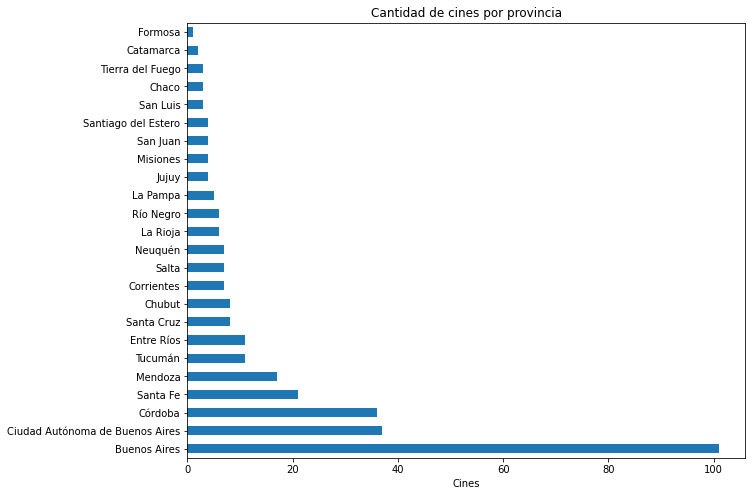

In [ ]:
# Graficamos los valores:
cines['provincia'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Cantidad de cines por provincia')
plt.xlabel('Cines')

In [ ]:
#Exploramos los detalles de los cines en Buenos Aires:
b_c=cines.loc[cines['provincia']== 'Buenos Aires']
b_c['localidad'].value_counts()


Mar del Plata    7
La Plata         7
Chivilcoy        3
Bahía Blanca     3
Quilmes          3
                ..
Los Toldos       1
Maipú            1
30 de agosto     1
Martínez         1
Zarate           1
Name: localidad, Length: 73, dtype: int64

### Dentro de la provincia de Buenos Aires, hay dos localidades con la mayor cantidad de cines: Mar del plata y La plata, ambas con un total de 7 complejos.

In [ ]:
#1. Agrupamos los cines según su cantidad de butacas:
m_cien=(cines.butacas > 100).sum()
m_cinco=(cines.butacas > 500).sum()
m_mil=(cines.butacas > 1000).sum()
m_dos= (cines.butacas > 2000).sum()

print('Cines con más de 100 butacas: {}'.format(m_cien))
print('Cines con más de 500 butacas: {}'.format(m_cinco))
print('Cines con más de 1000 butacas: {}'.format(m_mil))
print('Cines con más de 2000 butacas: {}'.format(m_dos))




Cines con más de 100 butacas: 291
Cines con más de 500 butacas: 135
Cines con más de 1000 butacas: 71
Cines con más de 2000 butacas: 19


In [ ]:
#1.1. Cine con mayor cantidad de butacas:
cines.loc[cines.butacas.idxmax()]

nombre             Showcase Norte
provincia            Buenos Aires
localidad                   Munro
latitud                -34.514341
longitud               -58.522151
pantallas                      17
butacas                      4214
tipo_de_gestion           Privada
espacio_incaa                  No
Name: 65, dtype: object

In [ ]:
#1.2. Cine con la menor cantidad de butacas:
cines.loc[cines.butacas.idxmin()]

nombre               San Martin
provincia          Buenos Aires
localidad            Las Flores
latitud              -36.015599
longitud             -59.098583
pantallas                     1
butacas                       0
tipo_de_gestion         Privada
espacio_incaa                No
Name: 41, dtype: object

In [ ]:
## 1. Cantidad de cines según su tipo de gestión:
tp= cines.tipo_de_gestion.value_counts()
print(tp)

Privada    255
Pública     59
Name: tipo_de_gestion, dtype: int64


Text(0, 0.5, '')

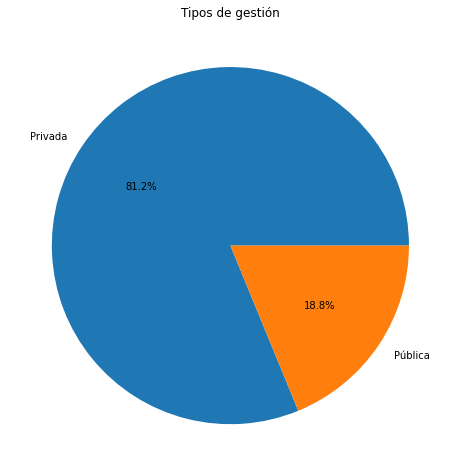

In [ ]:
# 1.1. Porcentaje de cines según su tipo de gestión:
tp.plot(kind='pie',autopct= '%1.1f%%', figsize=(8,10))
plt.title('Tipos de gestión')
plt.ylabel('')


In [ ]:
# 1. Canitdad de cines que son considerados espacios del INCAA:
inca= cines.espacio_incaa.value_counts()
print(inca)

No    266
Si     50
Name: espacio_incaa, dtype: int64


Text(0.5, 1.0, 'Espacio INCAA')

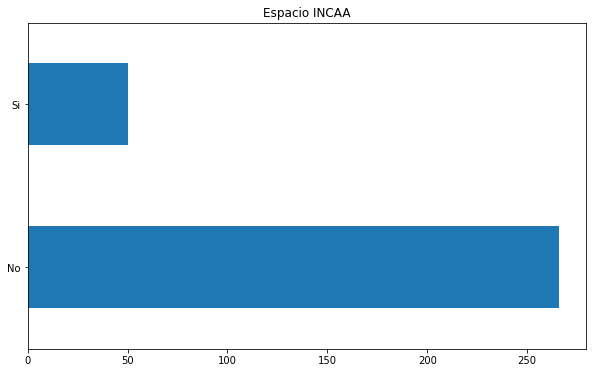

In [ ]:
# 1.1. Canitdad de cines que son considerados espacios del INCAA:
inca.plot(kind='barh', figsize= (10,6))
plt.title('Espacio INCAA')

In [ ]:
#Cine con la mayor cantidad de pantallas y butacas del país.
cines.loc[cines.pantallas.idxmax()]

nombre             Showcase Norte
provincia            Buenos Aires
localidad                   Munro
latitud                -34.514341
longitud               -58.522151
pantallas                      17
butacas                      4214
tipo_de_gestion           Privada
espacio_incaa                  No
Name: 65, dtype: object

In [ ]:
#Máximo de pantallas y butacas en los cines de cada provincia.
cines.groupby('provincia').max('pantallas')

,latitud,longitud,pantallas,butacas
provincia,,,,
Buenos Aires,-33.678826,-56.675313,17,4214
Catamarca,-28.464737,-65.774581,5,914
Chaco,-27.430995,-58.962672,5,820
Chubut,-42.766251,-65.035369,2,486
Ciudad Autónoma de Buenos Aires,-34.546344,-58.365288,12,3021
Corrientes,-27.464640,-57.085560,5,1140
Córdoba,-30.709913,-62.004292,12,2386
Entre Ríos,-30.759415,-57.984929,2,664
Formosa,-26.169497,-58.181483,3,619


# 3.2. Teatros.

In [ ]:
#Set
teatros.head()

In [ ]:
#1. Comenzamos explorando la cantidad de teatros en cada provincia argentina:
teatros['provincia'].value_counts()

Ciudad Autonoma de Buenos Aires                          349
Buenos Aires                                             346
Cordoba                                                  179
Santa Fe                                                 105
Mendoza                                                   58
Entre Ríos                                                42
Río Negro                                                 34
Tucumán                                                   28
Neuquén                                                   27
Misiones                                                  23
Jujuy                                                     19
Chaco                                                     17
Chubut                                                    16
Santiago del Estero                                       15
San Juan                                                  14
Corrientes                                                13
La Pampa                

### La provincia argentina con más teatros es Buenos Aires, mientras que Catamarca y Formosa tienen la menor cantidad de teatros con 4 establecimientos cada una.

Text(0.5, 1.0, 'Cantidad de teatros por provincia')

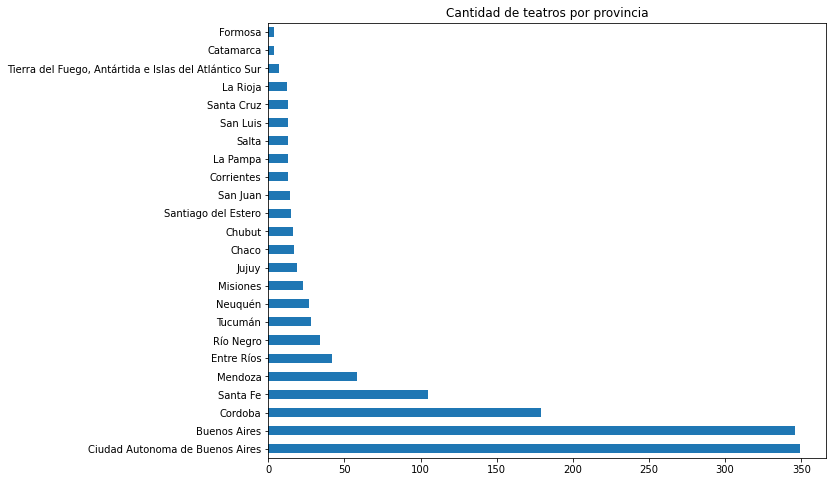

In [ ]:
#1.1 Graficamos los resultados.
teatros['provincia'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Cantidad de teatros por provincia')

In [ ]:
#1. El data set posee una columna de denominación específica, veamos de que se trata.
teatros['denominacion_especifica'].value_counts()

s/d                                         1132
Universidad                                   31
Grupo de Teatro Comunitario                    6
Sociedad Italiana                              4
Museo                                          2
Asociación Cultural Armenia                    1
Auditorio                                      1
Asociación Amigos de La Daia / Auditorio       1
Filial Banco Credicoop                         1
Escuela                                        1
Escuela de Circo                               1
Name: denominacion_especifica, dtype: int64

In [ ]:
#1. Investigamos la columna de actividad específica.
teatros['actividad_especifica'].value_counts()

Teatro,clases y talleres                        3
s/d                                             3
Presentación de obras teatrales                 3
Teatro,clases                                   3
Teatro, cursos y talleres                       3
                                               ..
Teatro,escuela,talleres de formación actoral    1
Teatro,Clases,FuncionesSala de ensayo           1
Obras de teatro                                 1
Producciones Teatrales,talleres de teatro       1
Academia de danzas y música                     1
Name: actividad_especifica, Length: 114, dtype: int64

## La mayoría de los teatros argentinos ofrecen espacios de aprendizaje. Impartiendo clases, cursos y talleres de formación actoral, así que como tambien en otras áreas, como la danza y la música.

In [ ]:
#1. Veamos cual es el teatro con más tiempo de actividad:
v=teatros['inicio_act'].unique()
v.sort()
print(v)

[   0 1866 1872 1878 1882 1887 1891 1896 1897 1901 1903 1904 1905 1906
 1907 1908 1909 1910 1911 1912 1913 1914 1917 1919 1921 1923 1924 1925
 1926 1928 1930 1931 1932 1934 1935 1936 1937 1938 1939 1940 1941 1942
 1944 1946 1948 1949 1952 1954 1956 1957 1958 1959 1961 1962 1963 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1977 1978 1979 1980
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


## El teatro con más años de actividad data de 1866, averiguemos de que complejo se trata:

In [ ]:
#1.1.
teatros.loc[teatros['inicio_act']==1866]

,nombre,provincia,localidad,informacion,latitud,longitud,actividad_especifica,denominacion_especifica,tipo_gestion,inicio_act,capacidad
453,Sala Biblioteca Franklin,San Juan,San Juan,NaN,-31.53560000,-68.52503000,NaN,NaN,Privado,1866,0


## La Sala Biblioteca Franklin, ubicada en la provincia de San Juan, es una institución que ofrece servicios de carácter público, entre ellos el teatro, que lleva más de 150 años en funcionamiento. Se puede conocer más sobre su historia aquí: [Biblioteca Franklin](http://bibliotecafranklin.org.ar/historia/)

## Busquemos el segundo teatro con más años de actividad registrado en nuestro data set:

In [ ]:
#1.2. 
teatros.loc[teatros['inicio_act']==1872]

,nombre,provincia,localidad,informacion,latitud,longitud,actividad_especifica,denominacion_especifica,tipo_gestion,inicio_act,capacidad
535,Teatro Opera,Ciudad Autonoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,s/d,-34.60353800,-58.37888700,NaN,s/d,Privado,1872,1614


## El teatro Opera de la cuidad de Buenos Aires es nuestro segundo establecimiento registrado como Teatro con más años de actividad. 

## Ahora, exploraremos la capacidad de los teatros argentinos:

In [ ]:
#1. Teatro con mayor capacidad de espectadores:
teatros.loc[teatros.capacidad.idxmax()]

nombre                     Anfiteatro Frank Romero Day
provincia                                      Mendoza
localidad                                      Mendoza
informacion                 Anfiteatro / Al aire libre
latitud                                   -32.89187100
longitud                                  -68.89314600
actividad_especifica                               NaN
denominacion_especifica                            s/d
tipo_gestion                                   Público
inicio_act                                           0
capacidad                                        21686
Name: 1148, dtype: object

In [ ]:
#1.1. Capacidad máxima de espectadores en provincia:
teatros.groupby('provincia').max()['capacidad']


<ipython-input-22-8f023a29fea5>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  teatros.groupby('provincia').max()['capacidad']


provincia
Buenos Aires                                              5000
Catamarca                                                 1103
Chaco                                                      400
Chubut                                                     250
Ciudad Autonoma de Buenos Aires                           4700
Cordoba                                                   3560
Corrientes                                               15000
Entre Ríos                                                 800
Formosa                                                    120
Jujuy                                                      490
La Pampa                                                   100
La Rioja                                                   454
Mendoza                                                  21686
Misiones                                                  5000
Neuquén                                                    650
Río Negro                                    

## La provincias argentinas con la menor capacidad máxima dentro de sus teatros son La pampa y Tierra del Fuego. Mientras que Mendoza se queda con el primer puesto en la capacidad máxima de espectadores posibles en una muestra teatral, seguida por Corrientes.

## Ahora nos movemos a otra columna del set: Tipo de gesstión. 

In [ ]:
#1. Investigamos cuantos teatros son privados y cuantos públicos.
c_g_t=teatros['tipo_gestion'].value_counts()
print(c_g_t)

Privado    997
Público    367
Name: tipo_gestion, dtype: int64


Text(0, 0.5, ' ')

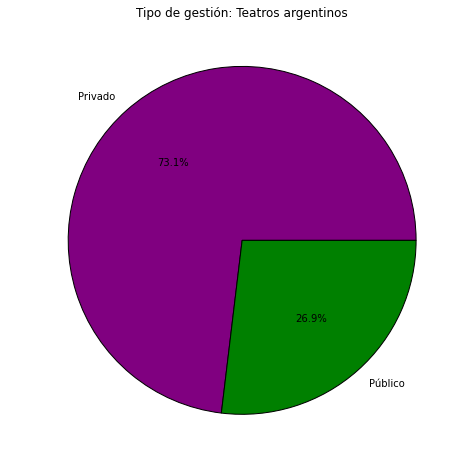

In [ ]:
#1.1. Graficamos los valores en porcentajes.
mc= ('purple', 'green')
c_g_t.plot(kind= 'pie', autopct= '%1.1f%%', figsize= (10,8),colors=mc, wedgeprops = {"edgecolor" : "black"} )
plt.title('Tipo de gestión: Teatros argentinos')
plt.ylabel(" ")

## El 73% de los teatros registrados es de carácter privado, mientras que el 26% es de carácter público.

#3.3. Centros culturales.

In [ ]:
#Set
centros_culturales.head()

,Nombre,Provincia,Localidad,Mail,Latitud,Longitud,año_inicio,Capacidad
0,Oihoy Casa Abierta,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,recepcion@oihoy.com.ar,-34.588377,-58.46471750,0,0
1,Carpe Diem,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,NaN,-34.631532,-58.39009233,0,0
2,Casa Cultural Victor Jara,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,jbonadeo5@gmail.com,-34.637101,-58.40917746,0,80
3,El Tanque Cultural,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Eltanquecultural@Gmail.Com,-34.537190,-58.51744842,0,300
4,Espacio Cultural Urbano,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Espacioculturalurbano@Gmail.Com,-34.597594,-58.43998560,0,140


In [ ]:
#Averiguamos cuantos centros culturales hay registrados en cada provincia.
centros_culturales['Provincia'].value_counts()

Buenos Aires                                             338
Ciudad Autónoma de Buenos Aires                          296
Santa Fe                                                  85
Córdoba                                                   77
Mendoza                                                   23
Entre Ríos                                                22
Chaco                                                     19
Río Negro                                                 19
Tucumán                                                   18
Neuquén                                                   18
Jujuy                                                     18
Misiones                                                  16
Salta                                                     15
San Luis                                                  15
Catamarca                                                 15
Chubut                                                    13
Santa Cruz              

Text(0.5, 0, 'Cantidad de centros culturales por provincia')

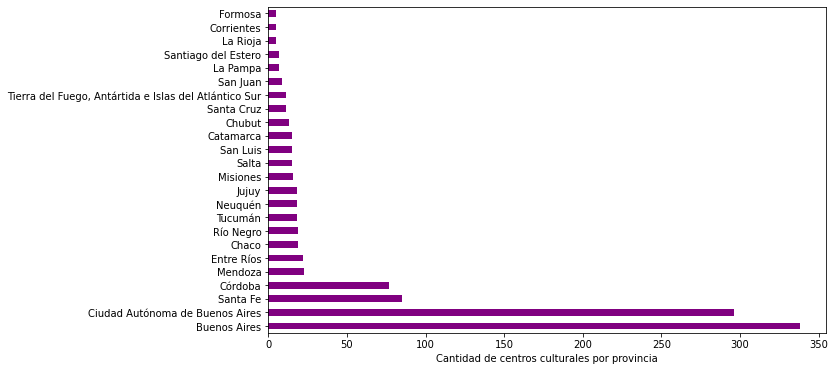

In [ ]:
#1.1 Graficamos los valores.
centros_culturales['Provincia'].value_counts().plot(kind= 'barh', color= 'purple', figsize= (10,6))
plt.xlabel('Cantidad de centros culturales por provincia')

In [ ]:
#Exploramos los años de inicio del dataset.
aicc=centros_culturales['año_inicio'].unique()
aicc.sort()
print(aicc)

[   0  100 1871 1878 1890 1891 1903 1904 1908 1913 1919 1922 1924 1925
 1927 1929 1930 1931 1932 1935 1936 1939 1940 1941 1943 1944 1951 1954
 1958 1959 1960 1961 1962 1963 1971 1973 1975 1980 1985 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2020]


In [ ]:
#Exploramos el centro cultural con más años de actividad de nuestro set:
centros_culturales.loc[centros_culturales['año_inicio']==1871]

,Nombre,Provincia,Localidad,Mail,Latitud,Longitud,año_inicio,Capacidad
983,Centro Cultural Municipal Dante Alighieri,Santa Fe,Esperanza,cultura@esperanza.gov.ar,-31.444841,-60.93021400,1871,300


## El centro cultural más antiguo registrado en nuestro set es el Centro Cultural Municipal Dante Alighiere y su inicio data de 1871. Se encuentra en la localidad de Esperanza, en la ciudad de Santa Fe. 

In [ ]:
#1. Averiguemos cuantos centros culturales se han registrado en el periodo de 2010 a 2020.
centros_culturales.loc[(centros_culturales['año_inicio']>2010)]

,Nombre,Provincia,Localidad,Mail,Latitud,Longitud,año_inicio,Capacidad
12,Mi Casa,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,787Aguero@Gmail.Com,-34.600746,-58.41086341,2013,150
31,Espacio Cultural Dinamo,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,davidprotte@hotmail.com,-34.632817,-58.44774710,2014,80
39,Kowalski Club De Cultura,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Elbardekowalski@Gmail.Com,-34.600343,-58.41500326,2014,60
73,Espacio Cultural Benigno,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,Info@Ecbenigno.Com.Ar,-34.630970,-58.40716600,2013,50
88,La Quince Espacio Cultural,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,laquincecultural@gmail.com,-34.597946,-58.44100774,2014,150
...,...,...,...,...,...,...,...,...
986,Ciclo Cultural Arte Viva,Santa Fe,San Jerónimo Norte,fundacionarteviva@gmail.com,-31.552398,-61.07638300,2014,150
988,FUNDACION UNIDOS POR LA MUSICA,Santa Fe,Rosario,fundacionunidosporlamusica91@gmail.com,-32.968090,-60.63988000,2011,0
1022,Germinal Terrakius,Santa Fe,Villa Amelia,auguizquierdo@gmail.com,-33.177060,-60.66495000,2016,45
1024,Centro Cultural Videla,Santa Fe,Videla,videlaccultural@gmail.com,-30.946503,-60.65644124,2016,80


## Desde el periodo de 2010 a 2020 se registraron solo 87 nuevos centros culturales en toda la República Argentina.

In [ ]:
#1.1. Calculamos cuantos centros se abrieron por año.
p= centros_culturales.loc[(centros_culturales['año_inicio']>2010)]
p['año_inicio'].value_counts().sort_index()

2011    13
2012    16
2013    14
2014    16
2015    13
2016     6
2017     4
2018     2
2020     3
Name: año_inicio, dtype: int64

Text(0, 0.5, 'Cantidad de centros abiertos')

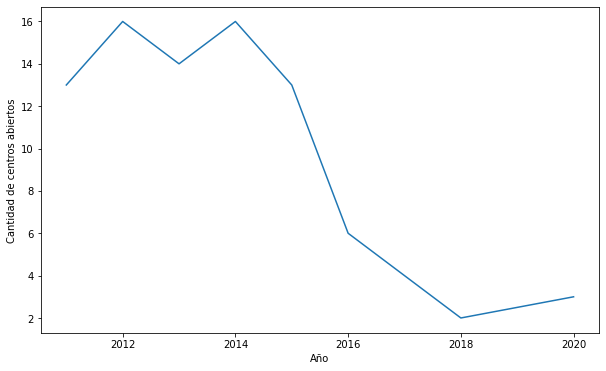

In [ ]:
#1.2 Graficamos los valores.
p['año_inicio'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.xlabel('Año')
plt.ylabel('Cantidad de centros abiertos')

## Desde el año 2014, la cantidad de apertura de centros culturales registrados en nuestro set a ido disminuyendo drásticamente. Solo a partir de año 2018 se ha generado un leve aumento que probablemente se vio afectado por el Covid. Dejando las cifras muchos más bajas que al principio de la década.

## Pasamos a nuestro siguiente tema: La capacidad que poseen los centros culturales argentinos.

In [ ]:
#1. Buscamos el centro con más capacidad de argentina.
centros_culturales.loc[centros_culturales.Capacidad.idxmax()]

Nombre                  Ciudad Cultural Konex
Provincia     Ciudad Autónoma de Buenos Aires
Localidad     Ciudad Autonoma de Buenos Aires
Mail             info@ciudadculturalkonex.org
Latitud                            -34.606676
Longitud                         -58.41040600
año_inicio                                  0
Capacidad                                2380
Name: 260, dtype: object

In [ ]:
#1.1 Bucamos las capacidades máximas por provincia.
centros_culturales.groupby('Provincia').max()['Capacidad'].sort_values()


<ipython-input-103-3e2e432a0944>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  centros_culturales.groupby('Provincia').max()['Capacidad'].sort_values()


Provincia
La Rioja                                                    0
Santa Cruz                                                  0
Formosa                                                     0
La Pampa                                                    0
Catamarca                                                  50
Chubut                                                    180
Santiago del Estero                                       200
Corrientes                                                200
Salta                                                     288
Río Negro                                                 300
Chaco                                                     342
Mendoza                                                   350
San Luis                                                  393
Tierra del Fuego, Antártida e Islas del Atlántico Sur     431
Entre Ríos                                                450
Misiones                                                  60

## La ciudad con la mayor capacidad dentro de un centro cultural es la Ciudad Autónoma de Buenos Aires, seguida por Jujuy y San Juan.

In [ ]:
#1.2. Buscamos los centros culturales de la ciudad de Jujuy y San Juan.
  #Jujuy
centros_culturales.loc[centros_culturales['Capacidad'] == 999]

,Nombre,Provincia,Localidad,Mail,Latitud,Longitud,año_inicio,Capacidad
791,Centro Cultural Martin Fierro Del Complejo Edu...,Jujuy,San Salvador de Jujuy,produccionesflg@gmail.com,-24.168896,-65.31932600,2001,999


In [ ]:
  #San Juan
centros_culturales.loc[centros_culturales['Capacidad'] == 976]


,Nombre,Provincia,Localidad,Mail,Latitud,Longitud,año_inicio,Capacidad
911,Complejo Auditorio Juan Victoria,San Juan,San Juan,auditoriojuanvictoria@sanjuan.gov.ar,-31.53095,-68.51022000,0,976


## Ciudad Cultural Konex, ubicado en la ciudad de Buenos Aires, es el centro cultural con más capacidad de Argetina. Seguido por el Centro Cultural Martin Fierro, en la provincia de Jujuy. 


# 3.4. Galerías de arte.

In [ ]:
#Set
galerias_arte.head()

,nombre,provincia,localidad,latitud,longitud,tipo_gestion
0,Oliva Drys espacio de arte,Buenos Aires,Azul,-36.778400,-59.85624000,Privado
1,"Isidoro, Espacio De Arte",Buenos Aires,Coronel Suárez,-37.459776,-61.93132350,Privado
2,Silencio (dispositivo sonoro poético),Buenos Aires,Mar del Plata,-37.983990,-57.54800752,Privado
3,Casa Intermitente,Buenos Aires,Mar del Plata,-38.064651,-57.5520899,Privado
4,Centro De Edición Taller Galería,Buenos Aires,Villa Lynch,-34.593398,-58.52592530,Privado


In [ ]:
#1. Averiguamos cuantas galerías de arte hay en cada provincia argentina.
cp=galerias_arte['provincia'].value_counts()
print(cp)

Ciudad Autónoma de Buenos Aires    151
Córdoba                             38
Buenos Aires                        18
Santa Fe                             9
Tucumán                              7
Santiago del Estero                  4
Mendoza                              3
Neuquén                              2
Salta                                2
Entre Ríos                           1
La Pampa                             1
San Juan                             1
San Salvador de Jujuy                1
Name: provincia, dtype: int64


Text(0.5, 1.0, 'Cantidad de galerías de arte por provincia')

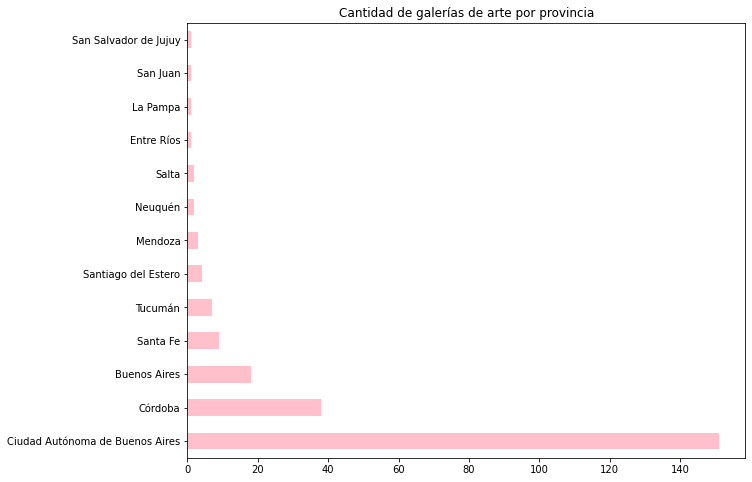

In [ ]:
#1.2. Graficamos los valores.
cp.plot(kind= 'barh', color= 'pink', figsize= (10,8))
plt.title('Cantidad de galerías de arte por provincia')

## La Ciudad Autónoma de Buenos Aires posee la mayor cantidad de galerías de arte, seguida por Córdoba. 

In [ ]:
#Veamos cuantas de las galerias argentinas son de gestión pública y cuántas privadas.
galerias_arte['tipo_gestion'].value_counts()

Privado    238
Name: tipo_gestion, dtype: int64

## Las 238 galerías de arte registradas en el set son de gestión privada.

# 3.5. Lugares históricos.

In [ ]:
#Set
lugares_históricos.head()

In [ ]:
#1. Chequeamos el set
lugares_históricos.head()

,Nombre,provincia,localidad,latitud,longitud,denominacion_especifica,jurisdiccion _declaratoria,fecha_de_inauguracion,decreto_o_ley
0,Cementerio de la Verde,Buenos Aires,25 de Mayo,-35.452139,-60.173889,Bien de Interés Histórico,Nacional,1989-09-03,Decreto
1,Pirámide que guarda los restos del Tte.Cnel. E...,Buenos Aires,9 de Julio,-35.470806,-60.905194,Bien de Interés Histórico,Nacional,1982-07-13,Decreto
2,Ex Mercado Municipal,Buenos Aires,Adolfo González Chaves,-38.033750,-60.098417,Bien de Interés Histórico y Artístico,Nacional,2014-07-21,Decreto
3,Palacio Municipal,Buenos Aires,Adolfo González Chaves,-38.032833,-60.098528,Bien de Interés Histórico,Nacional,2014-07-21,Decreto
4,Adrogué Tennis Club,Buenos Aires,Adrogué,-34.795194,-58.393417,Bien de Interés Histórico,Nacional,2014-07-22,Decreto


In [ ]:
#Comenzamos averiguando cuantos lugares históricos hay en las provincias argentinas.
php= lugares_históricos['provincia'].value_counts()
print(php)

Ciudad Autónoma de Buenos Aires                          399
Buenos Aires                                             279
Mendoza                                                   87
Córdoba                                                   74
Salta                                                     71
Santa Fe                                                  58
Tucumán                                                   50
La Rioja                                                  43
Corrientes                                                39
Tierra del Fuego, Antártida e Islas del Atlántico Sur     38
San Juan                                                  37
Jujuy                                                     33
Entre Ríos                                                33
Catamarca                                                 29
Formosa                                                   24
Chubut                                                    24
Río Negro               

Text(0.5, 1.0, 'Lugares históricos registrados por provincia')

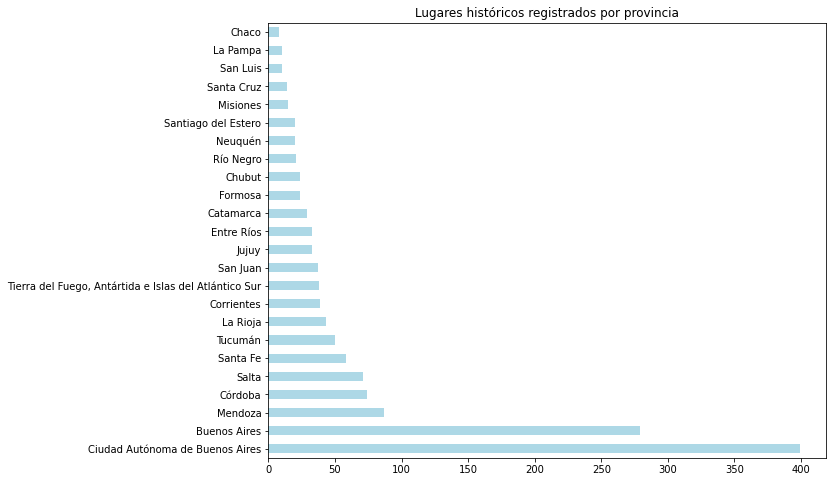

In [ ]:
#1.1 Graficamos los valores.
php.plot(kind='barh', color= 'lightblue', figsize=(10,8))
plt.title('Lugares históricos registrados por provincia')

## La Ciudad Autónoma de Buenos Aires cuenta con la mayor cantidad de lugares históricos de Argentina. Chaco, por el contrario, es la provincia con menor cantidad.

In [ ]:
#1. Veamos cual es la denominación con mayor cantidad de valores.
lugares_históricos['denominacion_especifica'].value_counts()

Bien de Interés Histórico              1303
Bien de Interés Histórico Artístico      80
Sitio Arqueológico                       40
Bien de Interés Arquitectónico            6
Bien de Interés Artístico                 2
Conjunto Urbano Arquitectónico            2
Área de Amortiguación Visual              1
Patrimonio Histórico Cultural             1
Bien de Interés Industrial Nacional       1
Name: denominacion_especifica, dtype: int64

## Argentina cuenta con 1303 bienes considerados de interes histórico y 80 bienes considerados de interés histórico y artístico. Por otra parte, hay 40 sitios arqueológicos en todo el país.

In [ ]:
# 1. Chequeamos cuantos son decretos y cuantos son leyes.
dol=lugares_históricos['decreto_o_ley'].value_counts()
print(dol)

Decreto          1211
Ley               223
Resolución SC       2
Name: decreto_o_ley, dtype: int64


Text(0, 0.5, 'Cantidad de bienes')

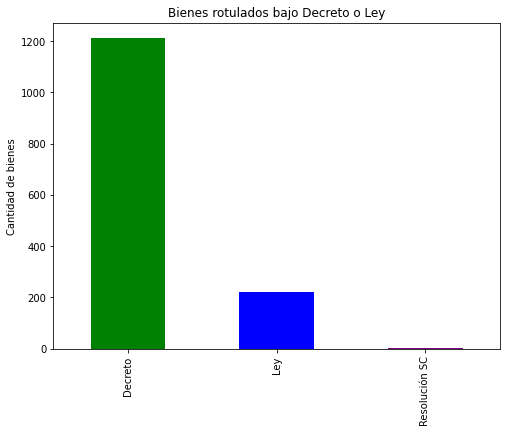

In [ ]:
#1.1. Graficamos los resultados.
dolc=['green','blue','purple']
dol.plot(kind='bar', color=dolc, figsize=(8,6))
plt.title('Bienes rotulados bajo Decreto o Ley')
plt.ylabel('Cantidad de bienes')

In [ ]:
#1. Revisemos los años de ignauración.
#1.1 Modificamos la fecha para que solo muestre el año.
lugares_históricos['fecha_de_inauguracion'] = lugares_históricos['fecha_de_inauguracion'].dt.strftime('%Y')

In [ ]:
#1.2. Chequeamos los valores.
lugares_históricos['fecha_de_inauguracion'].value_counts()

2014    164
1946    123
1997    117
1999     75
1942     66
       ... 
1987      1
1986      1
1937      1
1910      1
1965      1
Name: fecha_de_inauguracion, Length: 84, dtype: int64

## En 2014 se realizó el mayor número de inauguraciones, con 164 bienes declarados dentro de las denominaciones específicas que toma la República Argentina. El segundo año con más inauraciones fue 1946 con 123 y en el tercer puesto está 1997 con 117 inauraciones.

In [ ]:
#1. Busquemos los primeros bienes argentinos en ser inaugurados.
lugares_históricos['fecha_de_inauguracion'].value_counts().sort_index()

1910      1
1915      1
1928      2
1931      2
1933      1
       ... 
2014    164
2015     51
2016     16
2017     24
2018      1
Name: fecha_de_inauguracion, Length: 84, dtype: int64

In [ ]:
#1.2. 1910
lugares_históricos.loc[lugares_históricos['fecha_de_inauguracion']== '1910']

,Nombre,provincia,localidad,latitud,longitud,denominacion_especifica,jurisdiccion _declaratoria,fecha_de_inauguracion,decreto_o_ley
1161,Casa Natal de Domingo Faustino Sarmiento,San Juan,San Juan,-31.534806,-68.528917,Bien de Interés Histórico,Nacional,1910,Ley


## El primer bien declarado de interés histórico fue la casa natal de Domingo Faustino Sarmiento, en la provincia de San Juan.

In [ ]:
#1.3. 1915
lugares_históricos.loc[lugares_históricos['fecha_de_inauguracion']== '1915']

,Nombre,provincia,localidad,latitud,longitud,denominacion_especifica,jurisdiccion _declaratoria,fecha_de_inauguracion,decreto_o_ley
846,Templete Casa Natal del Gral. San Martín,Corrientes,Yapeyú,-29.471722,-56.814083,Bien de Interés Histórico,Nacional,1915,Ley


## El segundo bien en ser declarado de intéres histórico fue la casa natal del General San Martín, ubicada en la localidad de Yapeyú en la provincia de Corrientes. 

In [ ]:
#1.4. 1928
lugares_históricos.loc[lugares_históricos['fecha_de_inauguracion']== '1928']

,Nombre,provincia,localidad,latitud,longitud,denominacion_especifica,jurisdiccion _declaratoria,fecha_de_inauguracion,decreto_o_ley
1023,Templo de San Francisco,Mendoza,Mendoza,-32.886722,-68.841361,Bien de Interés Histórico,Nacional,1928,Decreto
1354,Primitivo Templo de la Merced en San Miguel de...,Tucumán,San Miguel de Tucumán,-26.831500,-65.201194,Bien de Interés Histórico,Nacional,1928,Decreto


## Por último, en 1928 dos templos: Templo de San Francisco en Mendoza y el Primitivo Templo de la Merced en Tucumán, fueron declarados como bienes de interés histórico, mediante un decreto nacional.

#3.6. Museos.

In [ ]:
#Set
museos.head()

In [ ]:
#1. Revisamos la cantidad de museos por provincia.
mp=museos['provincia'].value_counts()
print(mp)

Santa Fe                                                 162
Buenos Aires                                             152
Ciudad Autónoma de Buenos Aires                          132
Córdoba                                                  126
Mendoza                                                   63
Entre Ríos                                                57
Jujuy                                                     47
Chubut                                                    45
La Pampa                                                  45
Neuquén                                                   39
Salta                                                     36
Chaco                                                     33
Catamarca                                                 32
Misiones                                                  32
San Luis                                                  31
Tucumán                                                   26
San Juan                

Text(0.5, 1.0, 'Cantidad de museos por provincia')

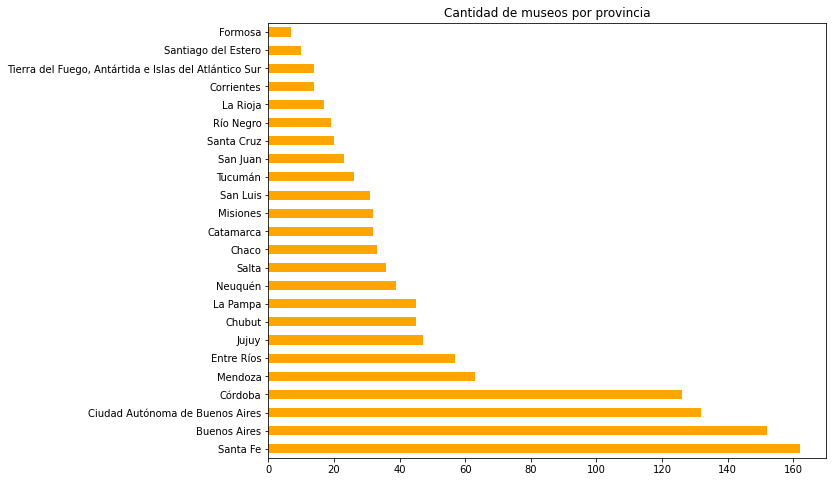

In [ ]:
#1.1. Graficamos los resultados.
mp.plot(kind='barh', color= 'orange', figsize=(10,8))
plt.title('Cantidad de museos por provincia')

## La provincia con más museos en su territorio es Santa Fe, seguida por Buenos Aires.

In [ ]:
#1. Veamos cual es el museo con más años de trayectoria de nuestro set.
museos['año_inauguracion'].value_counts().sort_index()

0       610
1823      1
1855      1
1878      1
1887      1
       ... 
2012      6
2013      3
2015      2
2016      1
2017      1
Name: año_inauguracion, Length: 109, dtype: int64

In [ ]:
#1.1. 1823
museos.loc[museos['año_inauguracion'] == 1823]

,nombre,provincia,localidad,Latitud,Longitud,jurisdiccion,año_inauguracion
352,Museo Argentino De Ciencias Naturales Bernardi...,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,-34.6048,-58.4377,Nacional,1823


## El museo argentino de ciencias naturales Bernardino Rivadavia es el museo con la fecha de inaugración más antigua del set.

In [ ]:
#1. Veamos cuantos museos de han abierto en la última década que registra el set.
mcd=museos.loc[museos['año_inauguracion'] >= 2007]
mcdp=mcd['año_inauguracion'].value_counts().sort_index()
print(mcdp)

2007    21
2008    15
2009     4
2010     7
2011     9
2012     6
2013     3
2015     2
2016     1
2017     1
Name: año_inauguracion, dtype: int64


Text(0.5, 0, 'Año')

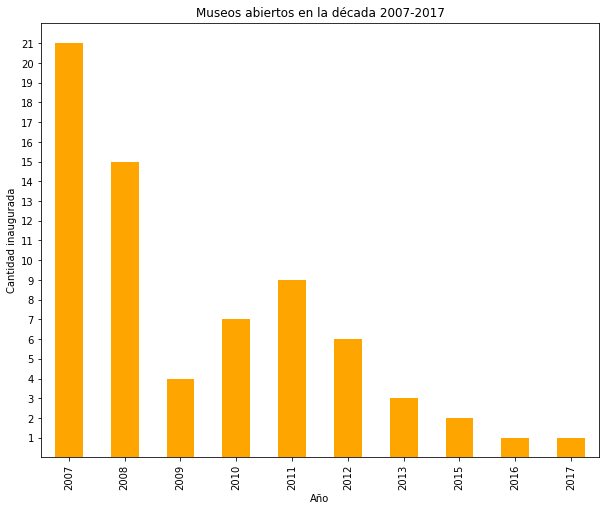

In [ ]:
#1.1. Graficamos los resultados.
mcdp.plot(kind='bar', color='orange', figsize= (10,8))
plt.yticks(range(1,22))
plt.title('Museos abiertos en la década 2007-2017')
plt.ylabel('Cantidad inaugurada')
plt.xlabel('Año')

## En los últimos 10 años que contempla el set, el año con más museos inaugurados fue el 2007, con 24 aperturas.

In [ ]:
#1. Veamos que tipo de jurisdicciones administran los museos argentinos.
mj=museos['jurisdiccion'].value_counts()
print(mj)

Municipal                              431
Privada                                267
Provincial                             170
Nacional                               143
Sin denominar                           32
Comunal                                 24
Mixta                                    5
Mixta Privada - Municipal                4
Mixta Provincial - Municipal             4
Mixta Orden Franciscana - Municipal      2
Mixta Provincial - Privada               1
Mixta Nacional - Municipal               1
Puerto                                   1
Name: jurisdiccion, dtype: int64


<AxesSubplot:>

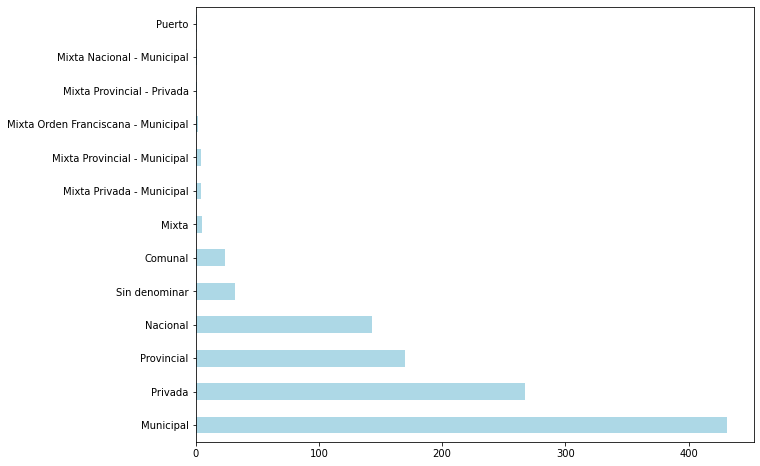

In [ ]:
#1.1. Graficamos los resultados.
mj.plot(kind='barh', color='lightblue', figsize=(10,8))


## Los primeros tres puestos se reparten de la siguiente forma: 431 museos pertenecen a jurisdicciones municipales, 267 a jurisdicciones privadas y 170 a jurisdicciones provinciales.

# 3.7. Bibliotecas populares.

In [ ]:
#Set.
bibliotecas_populares.head()

,Nombre,Provincia,Localidad,Latitud,Longitud,Tipo_gestion,año_inicio
0,Biblioteca Popular Juan P. Garramuno,San Juan,Rodeo,-30.209250,-69.130117,Comunitaria,1930
1,Biblioteca Popular Helena Larroque de Roffo,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.598461,-58.494690,Comunitaria,1916
2,Biblioteca Popular 12 de Octubre,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.613235,-58.448997,Comunitaria,1910
3,Biblioteca Popular Villa Pueyrredón Norte,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.575890,-58.501591,Comunitaria,1916
4,Biblioteca Popular Alberdi,Ciudad Autónoma de Buenos Aires,Ciudad de Buenos Aires,-34.596157,-58.437668,Comunitaria,1910


In [ ]:
#1. Contamos las bibliotecas por provincia argentina.
bxp=bibliotecas_populares['Provincia'].value_counts()
print(bxp)

Buenos Aires                       543
Santa Fe                           273
Córdoba                            185
La Pampa                            72
Neuquén                             70
Chaco                               70
Santiago del Estero                 67
Mendoza                             67
Río Negro                           66
Salta                               64
Entre Ríos                          58
Corrientes                          58
San Juan                            54
Chubut                              48
San Luis                            45
Ciudad Autónoma de Buenos Aires     43
Jujuy                               40
Misiones                            40
Catamarca                           38
Tucumán                             37
Formosa                             25
La Rioja                            24
Santa Cruz                          21
Tierra del Fuego                     9
Name: Provincia, dtype: int64


Text(0.5, 1.0, 'Cantidad de bibliotecas populares por provincia')

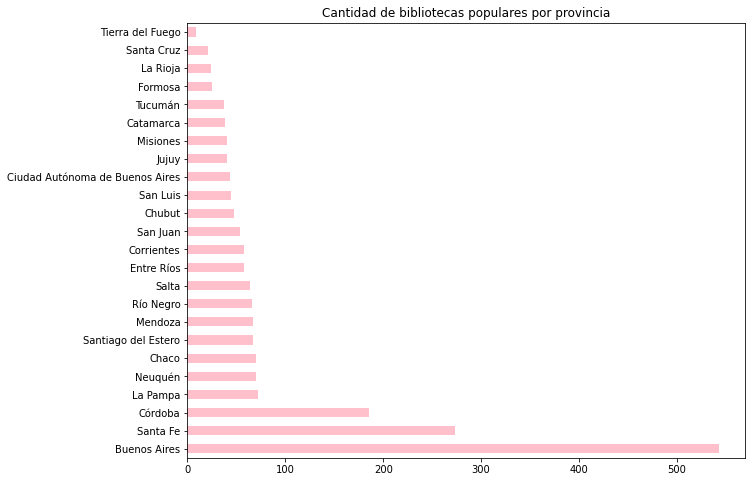

In [ ]:
#1.2. Graficamos los resultados.
bxp.plot(kind='barh', color= 'pink', figsize=(10,8))
plt.title('Cantidad de bibliotecas populares por provincia')


## La provincia argentina con más bibliotecas populares es Buenos Aires, seguida por Santa Fe y Córdoba.

In [ ]:
#1. Revisemos la biblioteca más antigua registrada en el set.
bibliotecas_populares['año_inicio'].value_counts().sort_index()

0       7
1866    1
1869    1
1871    1
1872    8
       ..
2013    4
2014    4
2015    1
2016    1
2017    1
Name: año_inicio, Length: 140, dtype: int64

In [ ]:
bibliotecas_populares.loc[bibliotecas_populares['año_inicio']==1866]

,Nombre,Provincia,Localidad,Latitud,Longitud,Tipo_gestion,año_inicio
199,Biblioteca Popular Sociedad Franklin,San Juan,San Juan,-31.535433,-68.525,Comunitaria,1866


## La biblioteca más antigua del set es la Biblioteca Popular Sociedad Franklin, inaugurada en 1866 en la provincia de San Juan.

In [ ]:
#1.1 Busquemos el año con más inauguraciones.
bibliotecas_populares['año_inicio'].value_counts()

1930    514
2000     47
1996     47
1997     41
1994     37
       ... 
1880      1
1866      1
1886      1
1874      1
1896      1
Name: año_inicio, Length: 140, dtype: int64

## El año en el que más bibliotecas populares se abrieron fue 1930, con 514 establecimientos. En segundo lugar esta el año 2000 con 47, la misma cantidad inaugurada en 1996.

In [ ]:
#1. Observemos que tipo de gestiones administran las bilbiotecas del pais.
bibliotecas_populares['Tipo_gestion'].value_counts()

Comunitaria    2017
Name: Tipo_gestion, dtype: int64

## Todas las bibliotecas registradas en el set son de gestión comunitaria.